### Zulema Perez

### CPSC 483

### Project 2: NumPy, Polynomial Regression, and Training vs. Test MSE

## Experiment 1

Load and examine the Boston dataset's features, target values, description.


In [1]:
%reset -f

from sklearn import datasets
import pandas as pd

dataset_boston = datasets.load_boston()
print(dataset_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
import pandas as pd

# Independent variables (features)
df_boston_features = pd.DataFrame(data = dataset_boston.data, columns = dataset_boston.feature_names)
df_boston_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
df_boston_target = pd.DataFrame(data = dataset_boston.target, columns = ['MEDV'])
df_boston_target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


# Experiment 2

Split the features and values into separate training and tests sets. Use 80% of the original data as a training set, and 20% for testing.

In [4]:
from sklearn.model_selection import train_test_split
# shuffle and split the features and values into separate training and test sets.
#use 80% of original data as a training set and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(df_boston_features, df_boston_target, test_size = 0.2, random_state = 110)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


## Experiment 3

Create a scatterplot of the training set showing the relationship between the feature LSTAT and the target value MEDV.

Text(0, 0.5, 'MEDV')

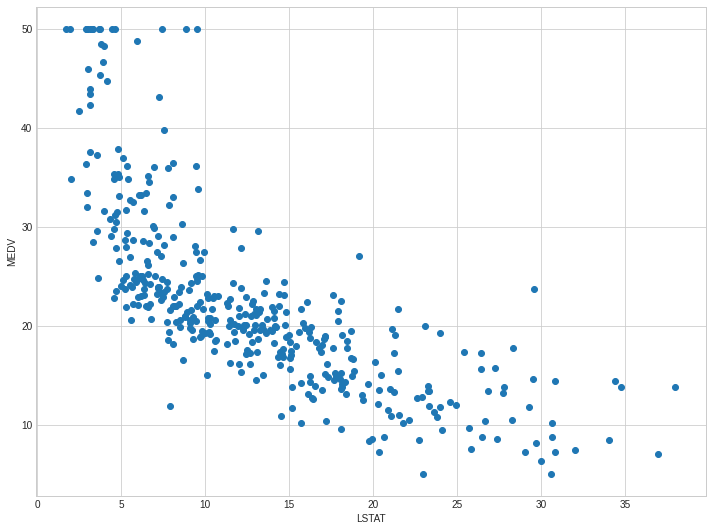

In [5]:
# Create scatter plot of the training set showing the relationship between the feature LSTAT and the target vaule MEDV
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

lstat_train_feature = X_train[['LSTAT']]
medv_train_target = y_train['MEDV']
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams['figure.figsize'] = fig_size
plt.plot(lstat_train_feature, medv_train_target, 'o');

plt.xlabel('LSTAT')
plt.ylabel('MEDV')

#### Does the relationship appear to be linear?

According to the scatter plot, the relationship between the training set feature LSTAT and training set target value MEDV does not appear to be linear. The scatter plot shows more of an exponential decay relationship with MEDV decreasing as LSTAT increases. 

## Experiment 4

With LSTAT as X and MEDV as t, compute w for the training set.

In [6]:
import numpy as np

x_ = lstat_train_feature[['LSTAT']]
# print(x_.ndim)

y_ = medv_train_target

# construct objects
X_ = np.hstack((np.ones_like(x_),x_))
t_ = y_
# compute w
XX_ = np.dot(X_.T,X_)
invXX_ = np.linalg.inv(XX_)
Xt_ = np.dot(X_.T,t_)
w = np.dot(invXX_,Xt_)
print(w)

[34.70405552 -0.95881782]


#### The equation for MEDV as a linear function of LSTAT is:

MEDV = 34.70405552 - 0.95881782(LSTAT)

## Experiment 5

Use w to add a line to your scatterplot from experiment (3).

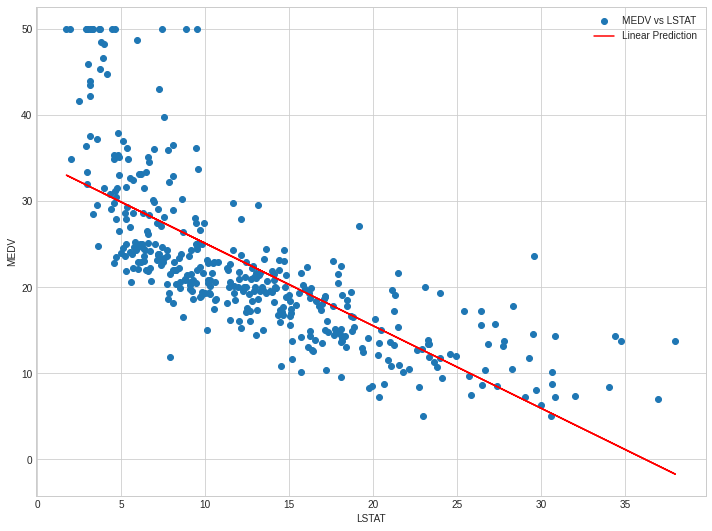

In [7]:
X_train_predict = np.dot(X_, w)

fig, newplt = plt.subplots()
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams['figure.figsize'] = fig_size
newplt.plot(lstat_train_feature, medv_train_target, 'o', label = 'MEDV vs LSTAT');
newplt.plot(x_, X_train_predict, 'r-', label = 'Linear Prediction')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')
newplt.legend()

#### How well does the model appear to fit the training set?

The model seems to fit the training set in the LSTAT range of 5 to 30. But overall the model does not fit the training set due to the relationship between the feature LSTAT and the target value MEDV being non-linear with MEDV decreasing as LSTAT increases.

## Experiment 6

Use w to find the response for each value of the LSTAT attribute in the test set, then compute the etst MSE for the model.

In [8]:
lstat_test = X_test[['LSTAT']]
t_test = y_test['MEDV']

X_lstat_test = np.hstack((np.ones_like(lstat_test),lstat_test))

test_predict = np.dot(X_lstat_test, w)

In [9]:
test_mse = np.square(np.subtract(t_test,test_predict)).mean()
print('The test MSE for the linear model is:')
print()
print(test_mse)

The test MSE for the linear model is:

25.381927457912873


## Experiment 7

Now add an $ x^2$ column to LSTAT's x column in the training set, then repeat experiments (4),(5), a (6) for MEDV as a quadratic function of LSTAT.

In [10]:
# Add an x^2 column to LSTAT's x column in the training set.
X_train_quad = np.hstack((np.ones_like(x_),x_, x_**2))

In [11]:
# 7 - ().Repeat experiment (4)
XX_train_quad = np.dot(X_train_quad.T,X_train_quad)
invXX_train_quad = np.linalg.inv(XX_train_quad)
Xt_train_quad = np.dot(X_train_quad.T, t_)
w_quad = np.dot(invXX_train_quad, Xt_train_quad)
print(w_quad)

[43.40127711 -2.40225248  0.04494442]


The equation for MEDV as a quadratic function of LSTAT is:

MEDV = 43.40127711 - 2.40225248(LSTAT)  +  0.04494442(LSTAT)$^2$ 

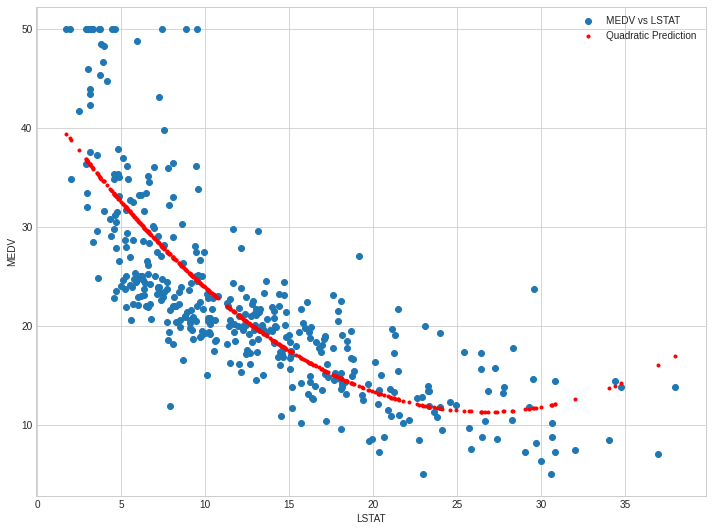

In [12]:
# 7 - Repeat experiment (5)
train_quad_predict = np.dot(X_train_quad, w_quad)

fig, newplt = plt.subplots()
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams['figure.figsize'] = fig_size
newplt.plot(lstat_train_feature, medv_train_target, 'o', label = 'MEDV vs LSTAT');
newplt.plot(x_, train_quad_predict, 'r.', label = 'Quadratic Prediction')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')
newplt.legend()

How well does the quadratic model appear fit the training set?

The quadratic model appears to fit the training set well, somewhat matching the shape of the training set.

In [13]:
# 7 - Repeat experiment (6)
x_quad_test = X_test[['LSTAT']]
t_test = y_test['MEDV']

X_quad_test = np.hstack((np.ones_like(x_quad_test),x_quad_test, x_quad_test**2))

test_quad_predict = np.dot(X_quad_test, w_quad)

# Compute the test MSE
test_mse_quad = np.square(np.subtract(t_test,test_quad_predict)).mean()
print('The test MSE for the quadratic model is:')
print()
print(test_mse_quad)

The test MSE for the quadratic model is:

21.450165503742237


#### Does the quadratic polynomial do a better job of predicitng the values in the test set?

Yes, the quadratic polynomial does a better job of predicting the values in the test set.
Comparing the test MSE of the linear model and the test MSE of the quadratic model:

The linear model MSE: 25.381927457912862
The quadratic model MSE: 21.450165503742223

The test MSE of the quadratic model is smaller (although not by a large amount) therefore it does a better job of predicting values in the test data set. 

## Experiment 8

Repeat experiment (4) with all the 13 input features as X and using np.linalg.lstsq().
Does adding additional features improve the performance on the test set compared to using only LSTAT?

In [14]:
# 8 - (4)
train_all_features = X_train
x_train_all = train_all_features[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]].to_numpy()

t_train_all = y_train['MEDV']

# Construct objects.
X_train_all = np.hstack((np.ones((x_train_all.shape[0],1)),x_train_all))

# compute w
w_all, residuals, _, _ = np.linalg.lstsq(X_train_all,t_train_all, rcond = None)
print(w_all)
print()
print(residuals)

[ 3.99848153e+01 -1.08427766e-01  5.38630021e-02  7.35469481e-03
  2.82548411e+00 -1.94510492e+01  3.58598703e+00  2.43424536e-03
 -1.63885404e+00  2.86401116e-01 -1.07987882e-02 -1.04138289e+00
  1.11007916e-02 -5.30004529e-01]

[9439.54036387]


#### What is the equation for MEDV as a linear function of all features?

MEDV = 3.99848153e+01 + -1.08427766e-01(CRIM) + 5.38630021e-02(ZN) + 7.35469481e-03(INDUS)+
2.82548411e+00(CHAS) + -1.94510492e+01(NOX) + 3.58598703e+00(RM) + 2.43424536e-03(AGE) + 
-1.63885404e+00(DIS) + 2.86401116e-01(RAD) + -1.07987882e-02(TAX) + 
-1.04138289e+00(PTRATIO) + 1.11007916e-02(B) + -5.30004529e-01(LSTAT)

In [15]:
# 8 - (6)

test_all_features = X_test

x_test_all = test_all_features[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]].to_numpy()

t_test_all = y_test['MEDV']

# Construct objects.
X_test_all = np.hstack((np.ones((x_test_all.shape[0], 1)), x_test_all))

test_all_predict = np.dot(X_test_all, w_all)

test_all_mse = np.square(np.subtract(t_test_all,test_all_predict)).mean()
print('The test MSE for the model is:')
print()
print(test_all_mse)

The test MSE for the model is:

16.6536463212634


#### Does adding additional features improve the performance on the test set compared to using LSTAT?

Comparing the LSTAT linear model MSE and the full feature linear model MSE:

LSTAT linear model MSE = 25.381927457912862

All feature linear model MSE = 16.6536463212634

Yes adding the additional features improves the performance on the test set compared to only having LSTAT as the only feature.

## Experiment 9

Now add $ x^2$ columns for all 13 features, and repeat experiment (8).

In [16]:
# 9 - (8 -> 4)
X = np.hstack((np.ones((X_train[['LSTAT']].size, 1)),
               X_train.values,
               np.power(X_train.values, 2)))

w = np.linalg.lstsq(X, y_train, rcond=None)[0]

print(w.T[0])

[ 1.67891284e+02 -3.74639223e-01 -7.16103326e-02 -2.15073416e-01
  1.38838080e+00 -2.53563834e+01 -1.77113943e+01 -2.21583773e-02
 -2.93220355e+00  7.13472334e-01 -3.07582302e-02 -5.96022745e+00
  2.08233011e-02 -1.33840659e+00  3.01435296e-03  9.06954189e-04
  9.33325143e-03  1.38838080e+00 -8.10394853e-01  1.60477683e+00
  1.78023343e-04  1.60995144e-01 -1.32962683e-02  2.29275764e-05
  1.42820511e-01 -3.31686452e-05  2.27595365e-02]


#### What is the equation for MEDV as a (quadratic) function of all features?

MEDV = 1.67891284e+02 + -3.74639223e-01(CRIM)+ -7.16103326e-02(ZN)+ -2.15073416e-01(INDUS)+
  1.38838080e+00(CHAS)+ -2.53563834e+01(NOX)+ -1.77113943e+01(RM)+ -2.21583773e-02(AGE)+
 -2.93220355e+00(DIS)+ 7.13472334e-01(RAD)+ -3.07582302e-02(TAX)+ -5.96022745e+00(PTRATIO)+
  2.08233011e-02(B)+ -1.33840659e+00(LSTAT)+ 3.01435296e-03$(CRIM)^2$+ 9.06954189e-04$(ZN)^2$+
  9.33325143e-03$(INDUS)^2$+ 1.38838080e+00$(CHAS)^2$+ -8.10394853e-01$(NOX)^2$+ 1.60477683e+00$(RM)^2$+
  1.78023343e-04$(AGE)^2$+ 1.60995144e-01$(DIS)^2$+ -1.32962683e-02$(RAD)^2$+ 2.29275764e-05$(TAX)^2$+
  1.42820511e-01$(PTRATIO)^2$+ -3.31686452e-05$(B)^2$+ 2.27595365e-02$(LSTAT)^2$


In [17]:
# 9 - (8 -> 6)
response = np.array([(w[0] + np.sum(np.dot(w[1:14].T, x))+
                      np.sum(np.dot(w[14:].T, np.power(x, 2))))
                     for x in X_test.values])

MSE = np.sum(np.power(response - y_test.values, 2))/response.size
print("The test MSE for the model is:")
print()
print(MSE)

The test MSE for the model is:

9.371254497571226


#### Does adding additional features improve the performance on the test set compared to using LSTAT?

Comparing the LSTAT (quadratic) model MSE and the full feature (quadratic) model MSE:

LSTAT quadratic model MSE = 21.450165503742223

All feature quadratic model MSE = 9.371254497569367

Yes adding the additional features improves the performance on the quadratic test set compared to having LSTAT as the only feature.

#### Does adding quadratic features improve the performance on the test set compared to using only linear features?

Comparing the full feature linear model MSE and the full feature quadratic model MSE:

All feature linear model MSE = 16.6536463212634

All feature quadratic model MSE = 9.371254497569367

Yes, adding quadratic features appears to improve the performance on the test set compared to using only linear features.

## Experiment 10

Compute the training MSE for experiments (8) and (9) and compare it to the test MSE. 

In [18]:
#train on linear (8)
X = np.hstack((np.ones((X_train[['LSTAT']].size, 1)),
               X_train.values))

w = np.linalg.lstsq(X, y_train, rcond=None)[0]

response = np.array([(w[0] + np.sum(np.dot(w[1:].T, x)))
                     for x in X_train.values])

MSE = np.sum(np.power(response - y_train.values, 2))/response.size
print("The training MSE for the linear model is:")
print()
print(MSE)

print()
print()
#train on quadratic (9)
X = np.hstack((np.ones((X_train[['LSTAT']].size, 1)),
               X_train.values,
               np.power(X_train.values, 2)))

w = np.linalg.lstsq(X, y_train, rcond=None)[0]

response = np.array([(w[0] + np.sum(np.dot(w[1:14].T, x)) +
                      np.sum(np.dot(w[14:].T, np.power(x, 2))))
                     for x in X_train.values])

MSE = np.sum(np.power(response - y_train.values, 2))/response.size
print("The training MSE for the quadratic model is:")
print()
print(MSE)

The training MSE for the linear model is:

23.365198920460042


The training MSE for the quadratic model is:

15.64696972236315


#### What explains the difference?

Comparing the test MSE(below) to the training MSE(above):

Test MSE for the linear model is: 16.6536463212634

Test MSE for the quadratic model is: 9.371254497569367

The difference  the two training MSEs is explained by the fact that increasing the order of the polynomial produces a more flexible, better fitting model on training data, thus we see a reduction in training MSE when comparing the linear model to the quadratic model. The difference between the training and the test MSEs for both models may be explained by being better predictors as the polynomial order for the model increases.

## Experiement 11

Repeat experiments (9) and (10), adding $x^3$ columns in addition to the x and $x^2$ columns for each feature. 

In [19]:
#test on cubic repeat (11 - (9->8->4))
X = np.hstack((np.ones((X_train[['LSTAT']].size, 1)),
               X_train.values,
               np.power(X_train.values, 2),
               np.power(X_train.values, 3)))

w = np.linalg.lstsq(X, y_train, rcond=None)[0]

print(w.T[0])

[ 1.78723522e+02 -7.31099664e-01  1.01817478e-03 -4.30689735e-01
  9.09750931e-01  4.05561128e+02 -1.67409640e+01  9.13681117e-02
 -7.41054634e+00  1.63588022e+00 -2.34989236e-01 -1.86023854e+01
 -2.62741715e-02 -1.97643757e+00  1.43878311e-02 -1.05702253e-03
  4.30402740e-02  9.09750915e-01 -6.91053335e+02  1.47808891e+00
 -1.98287058e-03  1.06179001e+00 -1.59138776e-01  5.30065748e-04
  9.02755910e-01  2.46607204e-04  6.80384097e-02 -9.20490068e-05
  1.44099478e-05 -1.21339799e-03  9.09750910e-01  3.56394701e+02
  6.67231041e-03  1.13348390e-05 -5.13191332e-02  4.39917010e-03
 -3.70717048e-07 -1.48711060e-02 -4.31821618e-07 -8.56960199e-04]


#### What is the equation for MEDV as a (cubic) function of all features?

MEDV = 1.78723522e+02+ -7.31099664e-01(CRIM)+  1.01817479e-03(ZN)+ -4.30689736e-01(INDUS)+
  9.09751583e-01(CHAS)+  4.05561128e+02(NOX)+ -1.67409640e+01(RM)+  9.13681117e-02(AGE)+
 -7.41054634e+00(DIS)+  1.63588022e+00(RAD)+ -2.34989236e-01(TAX)+ -1.86023854e+01(PTRATIO)+
 -2.62741715e-02(B)+ -1.97643757e+00(LSTAT)+  1.43878311e-02$(CRIM)^2$+ -1.05702253e-03$(ZN)^2$+
  4.30402741e-02$(INDUS)^2$+  9.09750588e-01$(CHAS)^2$+ -6.91053335e+02$(NOX)^2$+  1.47808891e+00$(RM)^2$+
 -1.98287058e-03$(AGE)^2$+  1.06179001e+00$(DIS)^2$+ -1.59138776e-01$(RAD)^2$+  5.30065748e-04$(TAX)^2$+
  9.02755910e-01$(PTRATIO)^2$+  2.46607204e-04$(B)^2$+  6.80384097e-02$(LSTAT)^2$+ -9.20490068e-05$(CRIM)^3$+
  1.44099477e-05$(ZN)^3$+ -1.21339799e-03$(INDUS)^3$+  9.09750584e-01$(CHAS)^3$+  3.56394701e+02$(NOX)^3$+
  6.67231040e-03$(RM)^3$+  1.13348390e-05$(AGE)^3$+ -5.13191332e-02$(DIS)^3$+  4.39917010e-03$(RAD)^3$+
 -3.70717047e-07$(TAX)^3$+ -1.48711060e-02$(PTRATIO)^3$+ -4.31821618e-07$(B)^3$+ -8.56960199e-04$(LSTAT)^3$

In [20]:
#test on cubic LSTAT repeat (11 - (9->8->6))

X2 = np.hstack((np.ones((X_train[['LSTAT']].size, 1)),
               X_train[['LSTAT']].values,
               np.power(X_train[['LSTAT']].values, 2),
               np.power(X_train[['LSTAT']].values, 3)))

w2 = np.dot(np.linalg.inv(np.dot(X2.T, X2)), 
            np.dot(X2.T, y_train))

response2 = np.array([(w2[0] + w2[1] * x+
                      w2[2]* np.power(x, 2)+
                      w2[3]* np.power(x, 3))
                    for x in X_test[['LSTAT']].values])

MSE2 = np.sum(np.power(response2 - y_test.values, 2))/response2.size
print("The test MSE for the cubic model on LSTAT only is:")
print()
print(MSE2)

### test on cubic all
print()
print()
response = np.array([(w[0] + np.sum(np.dot(w[1:14].T, x))+
                      np.sum(np.dot(w[14:27].T, np.power(x, 2)))+
                      np.sum(np.dot(w[27:].T, np.power(x, 3))))
                    for x in X_test.values])

MSE = np.sum(np.power(response - y_test.values, 2))/response.size
print("The test MSE for the cubic model is:")
print()
print(MSE)

The test MSE for the cubic model on LSTAT only is:

21.872761492382445


The test MSE for the cubic model is:

9.862470699591501


#### Does adding additional features improve the performance on the test set compared to using LSTAT?

Comparing the LSTAT cubic model MSE and the full feature cubic model MSE:

LSTAT cubic model MSE = 21.872761492382445

All feature cubic model MSE = 9.862470674485524

Yes adding the additional features improves the performance on the cubic test set compared to having LSTAT as the only feature.

In [21]:
#train on cubic (10)
response = np.array([(w[0] + np.sum(np.dot(w[1:14].T, x))+
                      np.sum(np.dot(w[14:27].T, np.power(x, 2)))+
                      np.sum(np.dot(w[27:].T, np.power(x, 3))))
                    for x in X_train.values])

MSE = np.sum(np.power(response - y_train.values, 2))/response.size
print("The training MSE for the cubic model is:")
print()
print(MSE)

The training MSE for the cubic model is:

14.116504311609702


#### What explains the difference?

Comparing the test MSE to the training MSE:

Test MSE for the linear model is: 16.6536463212634

Test MSE for the quadratic model is: 9.371254497569367

Test MSE for the cubic model is: 9.862470674485524

Training MSE for the linear model is: 23.365198920460042

Training MSE for the quadratic model is: 15.64696972236317

Training MSE for the cubic model is:14.11650431160973

The difference  the three training MSEs is explained by the fact that increasing the order of the polynomial produces a more flexible, better fitting model on training data,  as mentioned before. The difference between the training and the test MSEs for all models may be explained by the quadratic model being the best predictor because we begin to see a slight increase in MSE when we shift from a quadratic to a cubic model.

#### Does the cubic polynomial do a better job of predicting the values in the training set? Does it do a better job of predicting the values in the test set?

The cubic model does a better job of predicting the values in the training set compared to  the linear and quadratic models, and this is expected because increasing the order allows for the model the better fit the data. However, we begin to see an increase in the test MSE for cubic when compared to the quadratic suggesting that it is not as good of a predictor as the quadratic model.